# Import Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.lines as mlines
from datetime import datetime as dt
from scipy.stats import linregress
from scipy.stats import hmean

# Import Data
Data available on hydroshare via url: 

Tune, A., J. L. Druhan, C. R. Lawrence, Y. Liu, D. M. Rempe (2022). Dataset for "In-situ observations of organic carbon oxidation in shale regolithand implications for bedrock weathering", HydroShare, http://www.hydroshare.org/resource/82a50af377e14df0bdb994a982b24634

## Import incubation data

In [4]:
all_sample_incu = pd.read_csv("https://www.hydroshare.org/resource/82a50af377e14df0bdb994a982b24634/data/contents/all_sample_incubation.csv",index_col=0)
rock_chip_incu = pd.read_csv("https://www.hydroshare.org/resource/82a50af377e14df0bdb994a982b24634/data/contents/rock_chip_incubation.csv",index_col=0)


## Import radiocarbon data

In [5]:
# bring in the radiocarbon solid data
c14_rock = pd.read_excel("https://www.hydroshare.org/resource/82a50af377e14df0bdb994a982b24634/data/contents/new_radio_solid.xlsx")

In [6]:
# bring in the radiocarbon gas data
c14_gas = pd.read_excel("https://www.hydroshare.org/resource/82a50af377e14df0bdb994a982b24634/data/contents/new_radio_gas.xlsx")

In [7]:
c14_gasnew = c14_gas.dropna().copy()

## import diffusion coefficient data based on Schmidt et al. 2020

In [8]:
diff = pd.read_excel("https://www.hydroshare.org/resource/82a50af377e14df0bdb994a982b24634/data/contents/water_content_schmidt2020.xlsx")

## import well mineral data from Gu et al. 2020

In [9]:
wellminer = pd.read_excel("https://www.hydroshare.org/resource/82a50af377e14df0bdb994a982b24634/data/contents/ERCZO_miner_published_edit.xlsx")

## import vms mineral data

In [10]:
vms_miner = pd.read_excel("https://www.hydroshare.org/resource/82a50af377e14df0bdb994a982b24634/data/contents/mineral_database_vms.xlsx")
# clean up column names
vms_miner.columns = [c.replace(' ', '_') for c in vms_miner.columns]
vms_miner.columns = [c.replace('%', 'per') for c in vms_miner.columns]
vms_miner.columns = [c.replace('(', '') for c in vms_miner.columns]
vms_miner.columns = [c.replace(')', '') for c in vms_miner.columns]
vms_miner.columns = [c.replace('/', '_') for c in vms_miner.columns]
# check
vms_miner.tail(5)

,Site,Hole_ID,Sample,Min_Depth_Down_Borehole_ft,Max_Depth_Down_Borehole_ft,Avg_Depth_Down_Borehole_ft,Avg_Depth_Down_Borehole_m,Avg_Depth_Below_Ground_Surface_m,Client,Laboratory,...,Y_PPM,Zn_PPM,Zr_PPM,LOI_per,Sum_per,Total,C_ORG_per,TOT_C_per,TOT_S_per,C_inorgper
17,Rivendell,VMS2,VMS2 60-61,60.0,61.0,60.5,18.4404,15.105491,UT Austin,Bureau Veritas,...,20.0,NaN,126.000000,7.0,99.90,NaN,0.370000,0.530000,0.080000,0.1600
18,Rivendell,VMS2,VMS2 62-63,62.0,63.0,62.5,19.0500,15.604846,UT Austin,Bureau Veritas,...,20.0,NaN,122.000000,6.7,99.91,NaN,0.370000,0.500000,0.180000,0.1300
19,Rivendell,VMS2,VMS2 63-66,63.0,66.0,64.5,19.6596,16.104202,UT Austin,Bureau Veritas,...,20.0,NaN,125.000000,6.9,99.90,NaN,0.390000,0.560000,0.100000,0.1700
20,Rivendell,parent,parent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,134.090153,NaN,NaN,NaN,0.589446,0.714246,0.095748,0.1248
21,Rivendell,blank,blank,NaN,NaN,NaN,NaN,NaN,UT Austin,Bureau Veritas,...,3.0,NaN,5.000000,0.0,0.02,NaN,0.020000,0.020000,0.020000,0.0200


## import bulk density data

In [11]:
bulk_den = pd.read_excel("https://www.hydroshare.org/resource/82a50af377e14df0bdb994a982b24634/data/contents/bulk_density_vms.xlsx")

In [12]:
# make a column for the average bulk density based on the two results and add in the 5% porosity estimated by GU
bulk_den["avg_bulk_methods"] = np.nan
bulk_den.avg_bulk_methods = np.mean([bulk_den.accupyc_avg_absolut_denisty_g_cm3,bulk_den.geopyc_avg_envelope_density_g_cm3],axis=0)
bulk_den["avg_bulk_den"] = np.nan
bulk_den.avg_bulk_den = np.multiply(np.add(np.multiply(0.95,bulk_den.avg_bulk_methods),0.05),1000000)
bulk_den.tail()

,site_name,sample_name,depth_interval_start_m,depth_interval_end_m,avg_depth_m,accupyc_avg_absolut_denisty_g_cm3,accupyc_std_dev_absolute_density_g_cm3,geopyc_avg_envelope_density_g_cm3,geopyc_std_dev_envelope_density_g_cm3,avg_bulk_methods,avg_bulk_den
15,rivendell,VMS Hole 2,18.898,19.202,19.05,2.6796,0.0053,2.5755,0.0041,2.62755,2546172.5
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,0.6656,0.6656,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,0.2080,NaN,NaN,NaN,NaN,NaN


In [13]:
c14gas_plottinglater = c14_gasnew

## calculate tau

In [14]:
# function for tau
def tau(imm,immbed,mob,mobbed) : return np.subtract(np.multiply(np.divide(mob,mobbed),np.divide(immbed,imm)),1)

In [15]:
# create list of dataframe columns
columns = list(vms_miner)

In [42]:
blank_df = vms_miner[vms_miner.Sample == 'blank']
parent_df = vms_miner[vms_miner.Sample == 'VMS2 63-66']


In [43]:
# iterrate over dataframe to get tau for each element
for i in columns[14:-1]:
  vms_miner["tau" + "_" + i] = np.nan
  vms_miner["tau" + "_" + i] = tau(vms_miner.Ti_wt_per,parent_df.Ti_wt_per.item(),vms_miner[i],parent_df[i].item()) 



## error in tau

The duplicate samples from Bureau Veritas were exactly the same cocentration. However, the blank sample had a slight uncertainty that we will use for the error calculation

In [44]:
# error propoagation through the tau formula
def error_tau(error_immobile,error_mobile,immobile_weathered,immobile_parent,mobile_weathered,mobile_parent):
    sum_errors = ((error_immobile/immobile_weathered)**2)+((error_immobile/immobile_parent)**2)+((error_mobile/mobile_weathered)**2)+((error_mobile/mobile_parent)**2)
    tau_error = np.sqrt(sum_errors)
    return tau_error

In [45]:
vms_miner['OCtau_error'] = np.nan
vms_miner.OCtau_error = error_tau(blank_df.Ti_wt_per.item(), blank_df.C_ORG_per.item(),vms_miner.Ti_wt_per,parent_df.Ti_wt_per.item(),vms_miner.C_ORG_per,parent_df.C_ORG_per.item())


In [47]:
# vms_miner[['Avg_Depth_Below_Ground_Surface_m','tau_C_ORG_per','OCtau_error']]

# Functions to convert radiocarbon units



In [15]:
def Del2del (Del14C,del13C):
    rightexp = np.power(np.divide(np.subtract(1,np.divide(25,1000)),np.add(1,np.divide(del13C,1000))),-2)
    leftDel = np.add(np.divide(Del14C,1000),1)
    mid2 = np.multiply(leftDel,rightexp)
    mid1 = np.subtract(mid2,1)
    del14C = np.multiply(1000,mid1)
    return del14C

def del2Del (del14C,del13C):
    rightexp = np.power(np.divide(np.subtract(1,np.divide(25,1000)),np.add(1,np.divide(del13C,1000))),2)
    leftDel = np.add(np.divide(del14C,1000),1)
    mid2 = np.multiply(leftDel,rightexp)
    mid1 = np.subtract(mid2,1)
    Del14C = np.multiply(1000,mid1)
    return Del14C

def Del2fm (Del14C,year):
    multright = np.exp(np.divide(np.subtract(year,1950),8267))
    multleft = np.add(np.divide(Del14C,1000),1)
    fm = np.multiply(multleft,multright)
    return fm

def fm2Del (fm,year):
    multright = np.exp(np.divide(np.subtract(1950,year),8267))
    thing = np.multiply(fm,multright)
    Del = np.multiply(np.subtract(thing,1),1000)
    return Del

# Model to find the radiocarbon value of respired co2

## Depth-independent Egan/Davidson 1995 Radiocarbon diffusion model

### Prep the data for model

In [16]:
# atmospheric values - linear extrapolation from Graven et al. (2017) from 2000-2015 in the Northern Hemisphere

ca14Del2018 = 1.14
cal14Del2019 = -1.23
cal13del2018 = -8.51
cal13del2019 = -8.53

cal14del2018 = Del2del(ca14Del2018,cal13del2018)
cal14del2019 = Del2del(cal14Del2019,cal13del2019)
co2ppmatm2018 = 408
co2ppmatm2019 = 410

In [17]:
# create columns for delta14C
c14_gasnew["delta14C_sept"] = np.nan
c14_gasnew["delta14C_mar"] = np.nan

# convert D14C to delta14C
# september
F = np.array(c14_gasnew.Dc14_sept)
d13c = np.array(c14_gasnew.d13_sept)
c14_gasnew.delta14C_sept = Del2del(F,d13c)

# march
F2 = np.array(c14_gasnew.Dc14_mar)
d13c2 = np.array(c14_gasnew.d13_mar)
c14_gasnew.delta14C_mar = Del2del(F2,d13c2)

In [18]:
# find the error for the delta values (error propogation)
c14_gas["delta14C_mar"] = np.nan
c14_gas["delta14C_sept"] = np.nan

c14_gas["err_delta14C_mar"] = np.nan
c14_gas["err_delta14C_sept"] = np.nan

c14_gas.delta14C_mar = Del2del(c14_gas.Dc14_mar,c14_gas.d13_mar)
c14_gas.delta14C_sept = Del2del(c14_gas.Dc14_sept,c14_gas.d13_sept)

sept_err1 = (np.abs(c14_gas.delta14C_sept[5] - c14_gas.delta14C_sept[6]))/2
mar_err1 = (np.abs(c14_gas.delta14C_mar[5] - c14_gas.delta14C_mar[6]))/2

sept_err2 = (np.abs(c14_gas.delta14C_sept[2] - c14_gas.delta14C_sept[3]))/2
mar_err2 = (np.abs(c14_gas.delta14C_mar[2] - c14_gas.delta14C_mar[3]))/2

sept_err3 = (np.abs(c14_gas.delta14C_sept[8] - c14_gas.delta14C_sept[9]))/2
mar_err3 = (np.abs(c14_gas.delta14C_mar[8] - c14_gas.delta14C_mar[9]))/2

sept_err = np.nanmean([sept_err1,sept_err2,sept_err3])
mar_err = np.nanmean([mar_err1,mar_err2,mar_err3])

c14_gasnew["err_delta14C_mar"] = np.nan
c14_gasnew["err_delta14C_sept"] = np.nan

c14_gasnew.err_delta14C_mar = mar_err
c14_gasnew.err_delta14C_sept = sept_err

In [19]:
# Prep the gas data to only use the top 4 ports
# make backup copy of the data
c14_gasnewold = c14_gasnew

# adjust c14_gasnew dataframe to only have the top four ports
c14_gasnew = c14_gasnew.where(c14_gasnew.depth_m < 7)
c14_gasnew = c14_gasnew.dropna()

diffold = diff
diff = diff.where(diff.VMS_gasdepth <  7)
diff = diff.dropna()

### Functions for Egan model

In [20]:
# radiocarbon model to be applied to each depth
def rad_source(cs, ca, dels, dela): 
    del_source = (cs*(dels-8.8)-ca*(dela-8.8))/(1.0088*(cs-ca))
    return del_source 

# 13c model to be applied to each depth
def c13_source(cs, ca, dels13, dela13):
    del13_source = (cs*(dels13-4.4)-ca*(dela13-4.4))/(1.0044*(cs-ca))
    return del13_source   

### Run the model - these are the results from Egan

In [21]:
# March 
# run the model for radiocarbon
c14_gasnew["delc14_source_mar"] = np.nan
c14_gasnew.delc14_source_mar = rad_source(c14_gasnew.co2_per_mar*10000,co2ppmatm2019,c14_gasnew.delta14C_mar,cal14del2019)

# run the model for 13C
c14_gasnew["delc13_source_mar"] = np.nan
c14_gasnew.delc13_source_mar = c13_source(c14_gasnew.co2_per_mar*10000,co2ppmatm2019,c14_gasnew.d13_mar,cal13del2019)

# ___________________________________________________________________
# September 
# run the model for radiocarbon
c14_gasnew["delc14_source_sept"] = np.nan
c14_gasnew.delc14_source_sept = rad_source(c14_gasnew.co2_per_sept*10000,co2ppmatm2018,c14_gasnew.delta14C_sept,cal14del2018)

# run the model for 13C
c14_gasnew["delc13_source_sept"] = np.nan
c14_gasnew.delc13_source_sept = c13_source(c14_gasnew.co2_per_sept*10000,co2ppmatm2018,c14_gasnew.d13_sept,cal13del2018)


### Apply bimodal model (Hemingway) to diffusion model (Egan) results

In [26]:
# model with Fm14 values
c14_gas["co2_mol_m3_sept"] = np.nan
c14_gas.co2_mol_m3_sept = c14_gas.co2_per_sept*10000*(10E-6)*(1/(8.3245*284.15))
c14_gas["co2_mol_m3_mar"] = np.nan
c14_gas.co2_mol_m3_mar = c14_gas.co2_per_mar*10000*(10E-6)*(1/(8.3245*284.15))
# convert all the del14 source to F14 using the d13 source values
c14_gasnew["D14c_source_mar"] = np.nan
c14_gasnew.D14c_source_mar = del2Del(c14_gasnew.delc14_source_mar,c14_gasnew.delc13_source_mar)
c14_gasnew["D14c_source_sept"] = np.nan
c14_gasnew.D14c_source_sept = del2Del(c14_gasnew.delc14_source_sept,c14_gasnew.delc13_source_sept)

c14_gasnew["Fmc_source_mar"] = np.nan
c14_gasnew.Fmc_source_mar = Del2fm(c14_gasnew.D14c_source_mar,2019)
c14_gasnew["Fmc_source_sept"] = np.nan
c14_gasnew.Fmc_source_sept = Del2fm(c14_gasnew.D14c_source_sept,2018)

onemax = np.array([np.max(c14_gasnew.Fmc_source_mar),np.max(c14_gasnew.Fmc_source_sept)])
fracbio = np.max(onemax)
c14_gasnew["min_petro_ox_source_mar"] = np.nan
c14_gasnew.min_petro_ox_source_mar = 100*(c14_gasnew.co2_per_mar*((fracbio-c14_gasnew.Fmc_source_mar)/fracbio))/c14_gasnew.co2_per_mar
c14_gasnew["min_petro_ox_source_sept"] = np.nan
c14_gasnew.min_petro_ox_source_sept = 100*(c14_gasnew.co2_per_sept*((fracbio-c14_gasnew.Fmc_source_sept)/fracbio))/c14_gasnew.co2_per_sept


##### ERROR CALCULATION

In [38]:
# for radiocarbon
def error_Del2del_conv(Del14c,errDel14c,del13c,errdel13c):
    err_D14c1 = np.multiply(1,np.square(np.divide(np.add(1,np.divide(del13c,1000)),1-(25/1000))))
    err_D14c = np.square(np.multiply(errDel14c,err_D14c1))
    err_d13c1 = np.multiply(1000,np.multiply(np.square(np.add(1,np.divide(Del14c,1000))),np.divide(np.divide(np.add(1000,del13c),500000),np.square(1-(25/1000)))))
    err_d13c = np.square(np.multiply(errdel13c,err_d13c1))
    test = np.add(err_D14c,err_d13c)
    err_answer = np.sqrt(test)
    return err_answer

def error_radio_resp(cs,ca,errcs,errca,del14ca,del14cs,errdel14ca,errdel14cs):
    err_cs1 = np.divide(np.subtract(np.multiply(np.multiply(1.0088,np.subtract(cs,ca)),np.subtract(del14cs,8.8)),np.multiply(1.0088,np.subtract(np.multiply(cs,np.subtract(del14cs,8.8)),np.multiply(ca,np.subtract(del14ca,8.8))))),
                        np.exp(np.multiply(1.0088,np.subtract(cs,ca))))
    err_cs = np.exp(np.multiply(errcs,err_cs1))
    err_ca1 = np.divide(np.subtract(np.multiply(np.multiply(1.0088,np.subtract(cs,ca)),np.subtract(8.8,del14ca)),np.multiply(-1.0088,np.subtract(np.multiply(cs,np.subtract(del14cs,8.8)),np.multiply(ca,np.subtract(del14ca,8.8))))),
                        np.exp(np.multiply(1.0088,np.subtract(cs,ca))))
    err_ca = np.square(np.multiply(errca,err_ca1))
    err_del14cs1 = np.divide(cs,np.multiply(1.0088,np.subtract(cs,ca)))
    err_del14cs = np.square(np.multiply(errdel14cs,err_del14cs1))
    err_def14ca1 = np.divide(-ca,np.multiply(1.0088,np.subtract(cs,ca)))
    err_def14ca = np.square(np.multiply(errdel14ca,err_def14ca1))
    test = np.add(np.add(np.add(err_cs,err_ca),err_del14cs),err_def14ca)
    err_answer = np.sqrt(test)
    return err_answer

# for stable isotopes
def error_stab_resp(cs,ca,errcs,errca,del13ca,del13cs,errdel13ca,errdel13cs):
    err_cs1 = np.divide(np.subtract(np.multiply(np.multiply(1.0044,np.subtract(cs,ca)),np.subtract(del13cs,4.4)),np.multiply(1.0044,np.subtract(np.multiply(cs,np.subtract(del13cs,4.4)),np.multiply(ca,np.subtract(del13ca,4.4))))),
                        np.exp(np.multiply(1.0044,np.subtract(cs,ca))))
    err_cs = np.exp(np.multiply(errcs,err_cs1))
    err_ca1 = np.divide(np.subtract(np.multiply(np.multiply(1.0044,np.subtract(cs,ca)),np.subtract(4.4,del13ca)),np.multiply(-1.0044,np.subtract(np.multiply(cs,np.subtract(del13cs,4.4)),np.multiply(ca,np.subtract(del13ca,4.4))))),
                        np.exp(np.multiply(1.0044,np.subtract(cs,ca))))
    err_ca = np.square(np.multiply(errca,err_ca1))
    err_del13cs1 = np.divide(cs,np.multiply(1.0044,np.subtract(cs,ca)))
    err_del13cs = np.square(np.multiply(errdel13cs,err_del13cs1))
    err_def13ca1 = np.divide(-ca,np.multiply(1.0044,np.subtract(cs,ca)))
    err_def13ca = np.square(np.multiply(errdel13ca,err_def13ca1))
    test = np.add(np.add(np.add(err_cs,err_ca),err_del13cs),err_def13ca)
    err_answer = np.sqrt(test)
    return err_answer

def error_del2Del_conv(del14c,errdel14c,del13c,errdel13c):
    err_d14c1 = np.square(np.divide(1-(25/1000),np.add(1,np.divide(del13c,1000))))
    err_d14c = np.square(np.multiply(errdel14c,err_d14c1))
    err_d13c1 = np.divide(np.multiply(del14c,2000000*(np.square(1-(25/1000)))),np.power(np.add(del13c,1000),3))
    err_d13c = np.square(np.multiply(errdel13c,err_d13c1))
    test = np.add(err_d14c,err_d13c)
    err_answer = np.sqrt(test)
    return err_answer

def error_hemingway(Fm_s_err,Fm_s,Fm_bio_err,Fm_bio,hem_percent):
    err1 = np.sqrt(np.add(np.square(np.divide(Fm_s_err,Fm_s)),np.square(np.divide(Fm_bio_err,Fm_bio))))
    err_answer = np.multiply(1,err1)
    return err_answer

In [39]:
# error in del14c from Del14c
c14_gasnew["err_d14c_sept"] = np.nan
c14_gasnew.err_d14c_sept = error_Del2del_conv(c14_gasnew.Dc14_sept,c14_gasnew.D_uncert_sept,c14_gasnew.d13_sept,c14_gasnew.d13_error)

c14_gasnew["err_d14c_mar"] = np.nan
c14_gasnew.err_d14c_mar = error_Del2del_conv(c14_gasnew.Dc14_mar,c14_gasnew.D_uncert_mar,c14_gasnew.d13_mar,c14_gasnew.d13_error)

In [40]:
# error in the source value after propogating
c14_gasnew["err_resp_d14c_sept"] = np.nan
c14_gasnew.err_resp_d14c_sept = error_radio_resp(c14_gasnew.co2_per_sept,co2ppmatm2018/10000,0.1,0.001,cal14del2018,c14_gasnew.delta14C_sept,np.nanmean(c14_gasnew.err_d14c_sept),c14_gasnew.err_d14c_sept)

c14_gasnew["err_resp_d13c_sept"] = np.nan
c14_gasnew.err_resp_d13c_sept = error_stab_resp(c14_gasnew.co2_per_sept,co2ppmatm2018/10000,0.1,0.001,cal13del2018,c14_gasnew.d13_sept,0.15,c14_gasnew.d13_error)

c14_gasnew["err_resp_d14c_mar"] = np.nan
c14_gasnew.err_resp_d14c_mar = error_radio_resp(c14_gasnew.co2_per_mar,co2ppmatm2019/10000,0.1,0.001,cal14del2019,c14_gasnew.delta14C_mar,np.nanmean(c14_gasnew.err_d14c_mar),c14_gasnew.err_d14c_mar)

c14_gasnew["err_resp_d13c_mar"] = np.nan
c14_gasnew.err_resp_d13c_mar = error_stab_resp(c14_gasnew.co2_per_mar,co2ppmatm2019/10000,0.1,0.001,cal13del2019,c14_gasnew.d13_mar,0.15,c14_gasnew.d13_error)


In [41]:
# error in the source value after turning back into Del
c14_gasnew["err_resp_D14c_sept"] = np.nan
c14_gasnew.err_resp_D14c_sept = error_del2Del_conv(c14_gasnew.delc14_source_sept,c14_gasnew.err_resp_d14c_sept,c14_gasnew.delc13_source_sept,c14_gasnew.err_resp_d13c_sept)

c14_gasnew["err_resp_D14c_mar"] = np.nan
c14_gasnew.err_resp_D14c_mar = error_del2Del_conv(c14_gasnew.delc14_source_sept,c14_gasnew.err_resp_d14c_sept,c14_gasnew.delc13_source_sept,c14_gasnew.err_resp_d13c_sept)

In [42]:
# error in the source value after turning into Fm from Del
c14_gasnew["err_resp_fm_sept"] = np.nan
c14_gasnew.err_resp_fm_sept = Del2fm(c14_gasnew.err_resp_D14c_sept,2018)-1
c14_gasnew["err_resp_fm_mar"] = np.nan
c14_gasnew.err_resp_fm_mar = Del2fm(c14_gasnew.err_resp_D14c_mar,2019)-1

In [43]:
# error in the hemingway calculation
fracbio_err = c14_gasnew.err_resp_fm_mar.iloc[0]

c14_gasnew["err_min_petro_ox_source_sept"] = np.nan
c14_gasnew.err_min_petro_ox_source_sept = error_hemingway(c14_gasnew.err_resp_fm_sept,c14_gasnew.Fmc_source_sept,fracbio_err,fracbio,c14_gasnew.min_petro_ox_source_sept)

c14_gasnew["err_min_petro_ox_source_mar"] = np.nan
c14_gasnew.err_min_petro_ox_source_mar = error_hemingway(c14_gasnew.err_resp_fm_mar,c14_gasnew.Fmc_source_mar,fracbio_err,fracbio,c14_gasnew.min_petro_ox_source_mar)

### Apply the Hemingway binary model to results

In [47]:
# function for hemingway model
def hemsolid(perOCsoil,fsoil,fbio):
  result1 = np.multiply(perOCsoil,np.subtract(1,np.divide(fsoil,fbio)))
  return result1

def hemgas(fsoil,fbio): 
  result1 = np.multiply(100,np.subtract(1,np.divide(fsoil,fbio)))
  return result1

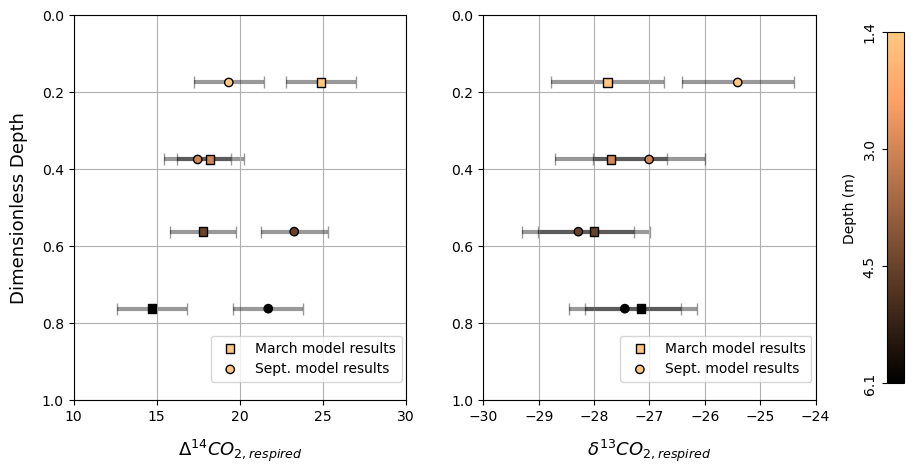

In [62]:
variable4 = 1000
variable5 = 8
sizeinterp = 3
xlimiso = 0.04
from matplotlib import gridspec

gs = gridspec.GridSpec(1, 3, width_ratios=[3,3,1], height_ratios= [1]) 
plt.subplots(nrows = 1, ncols=3, figsize=(12,5), gridspec_kw={"width_ratios":[100,100, 0.001]})
colors = plt.cm.copper(np.linspace(0,1,np.size(c14_gasnew.depth_m)))
colors = colors[::-1]

test1 = list(range(0, np.size(c14_gasnew.depth_m)))

# ______________________________________________________________
plt.subplot(gs[0])
colors = colors[::-1]

colors = plt.cm.copper(np.linspace(0,1,c14_gasnew.depth_m.size))
colors = colors[::-1]

plt.errorbar(del2Del(np.divide(c14_gasnew.delc14_source_mar,1),np.divide(c14_gasnew.delc13_source_mar,1)),np.divide(c14_gasnew.depth_m,variable5),
             xerr=c14_gasnew.err_resp_D14c_mar ,fmt='.',ecolor='black', elinewidth=3, capsize=4, alpha = 0.4,zorder=1)
plt.errorbar(del2Del(np.divide(c14_gasnew.delc14_source_sept,1),np.divide(c14_gasnew.delc13_source_sept,1)),np.divide(c14_gasnew.depth_m,variable5),
             xerr=c14_gasnew.err_resp_D14c_sept ,fmt='.',ecolor='black', elinewidth=3, capsize=4, alpha = 0.4,zorder=2)
plt.scatter(del2Del(np.divide(c14_gasnew.delc14_source_mar,1),np.divide(c14_gasnew.delc13_source_mar,1)),np.divide(c14_gasnew.depth_m,variable5),color =colors, edgecolor= 'k',marker='s', label = 'March model results',zorder=3)
plt.scatter(del2Del(np.divide(c14_gasnew.delc14_source_sept,1),np.divide(c14_gasnew.delc13_source_sept,1)),np.divide(c14_gasnew.depth_m,variable5),color =colors, edgecolor= 'k',marker='o', label = 'Sept. model results',zorder=4)

plt.xlabel('$\Delta^{14}CO_{2,respired}$',fontsize=13,labelpad=10)
plt.ylabel('Dimensionless Depth',fontsize=13,labelpad=10)
plt.gca().set_ylim([0, 1])
plt.gca().set_xlim([10, 30])
plt.gca().invert_yaxis()
plt.legend(loc='lower center',bbox_to_anchor=(0.7, 0.03))
plt.grid()

plt.subplot(gs[1])
colors = colors[::-1]

colors = plt.cm.copper(np.linspace(0,1,c14_gasnew.depth_m.size))
colors = colors[::-1]

plt.errorbar(np.divide(c14_gasnew.delc13_source_mar,1),np.divide(c14_gasnew.depth_m,variable5),
             xerr=c14_gasnew.err_resp_d13c_mar ,fmt='.',ecolor='black', elinewidth=3, capsize=4, alpha = 0.4,zorder=1)
plt.errorbar(np.divide(c14_gasnew.delc13_source_sept,1),np.divide(c14_gasnew.depth_m,variable5),
             xerr=c14_gasnew.err_resp_d13c_sept ,fmt='.',ecolor='black', elinewidth=3, capsize=4, alpha = 0.4,zorder=2)

plt.scatter(np.divide(c14_gasnew.delc13_source_mar,1),np.divide(c14_gasnew.depth_m,variable5),color =colors, edgecolor= 'k',marker='s', label = 'March model results',zorder=3)
plt.scatter(np.divide(c14_gasnew.delc13_source_sept,1),np.divide(c14_gasnew.depth_m,variable5),color =colors, edgecolor= 'k',marker='o', label = 'Sept. model results',zorder=4)

plt.xlabel('$\delta^{13}CO_{2,respired}$',fontsize=13,labelpad=10)
plt.gca().set_ylim([0, 1])
plt.gca().set_xlim([-30, -24])
plt.gca().invert_yaxis()
plt.legend(loc='lower center',bbox_to_anchor=(0.7, 0.03))
plt.grid()

ax2 = plt.gca()

plt.subplot(gs[2])

ax = plt.gca()

axp = ax.imshow(np.random.randint(0, 4, (4, 4)),cmap='copper')
cbar = plt.colorbar(axp,ax=[ax], location='left', ticks=[0,1,2,3])

cbar.ax.set_yticklabels([c14_gasnew.depth_m.iloc[3], c14_gasnew.depth_m.iloc[2],c14_gasnew.depth_m.iloc[1],c14_gasnew.depth_m.iloc[0]],rotation='vertical',verticalalignment='center')  # vertically oriented colorbar
cbar.set_label('Depth (m)')
ax.set_aspect('auto')
ax.remove()
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.3)

# # ______________________________________________
# fig1 = plt.gcf()
# fig1.savefig('diffusionplot14c.pdf', dpi=fig1.dpi)
# files.download("diffusionplot14c.pdf")

## Plot the hemingway results

# this is where change air-filled

In [64]:
# flux calculations for the sampled dates
fb5_mar2019 =0.0237*12.01;
fb10_mar2019 =0.0473*12.01;

fb5_sept2018 = 0.0270*12.01;
fb10_sept2018 = 0.0539*12.01;

farq5_mar2019 = 0.3170;
farq10_mar2019 = 0.6340;

farq5_sept2018 = 0.9330;
farq10_sept2018 =  1.8660;

In [67]:
diff4fun = diff.set_index([pd.Index([1, 2, 4, 5])])

In [68]:
# # calculate the flux of oxidized carbon with depth
c14_gasnew["petro_mar_fb5"] = np.nan
c14_gasnew.petro_mar_fb5 = np.multiply(((diff4fun["air-filled_por_may"]-0.01)/0.05)*(fb5_mar2019/4),c14_gasnew.min_petro_ox_source_mar/100)
c14_gasnew["petro_mar_fb10"] = np.nan
c14_gasnew.petro_mar_fb10 = np.multiply(((diff4fun["air-filled_por_may"]+0.01)/0.05)*(fb10_mar2019/4),c14_gasnew.min_petro_ox_source_mar/100)
c14_gasnew["petro_sep_fb5"] = np.nan
c14_gasnew.petro_sep_fb5 = np.multiply(((diff4fun["air-filled_por_oct"]-0.01)/0.05)*(fb5_sept2018/4),c14_gasnew.min_petro_ox_source_sept/100)
c14_gasnew["petro_sep_fb10"] = np.nan
c14_gasnew.petro_sep_fb10 = np.multiply(((diff4fun["air-filled_por_oct"]+0.01)/0.05)*(fb10_sept2018/4),c14_gasnew.min_petro_ox_source_sept/100)

c14_gasnew["petro_mar_farq5"] = np.nan
c14_gasnew.petro_mar_farq5 = np.multiply(((diff4fun["air-filled_por_may"]-0.01)/0.05)*(farq5_mar2019/4),c14_gasnew.min_petro_ox_source_mar/100)
c14_gasnew["petro_mar_farq10"] = np.nan
c14_gasnew.petro_mar_farq10 = np.multiply(((diff4fun["air-filled_por_may"]+0.01)/0.05)*(farq10_mar2019/4),c14_gasnew.min_petro_ox_source_mar/100)
c14_gasnew["petro_sep_farq5"] = np.nan
c14_gasnew.petro_sep_farq5 = np.multiply(((diff4fun["air-filled_por_oct"]-0.01)/0.05)*(farq5_sept2018/4),c14_gasnew.min_petro_ox_source_sept/100)
c14_gasnew["petro_sep_farq10"] = np.nan
c14_gasnew.petro_sep_farq10 = np.multiply(((diff4fun["air-filled_por_oct"]+0.01)/0.05)*(farq10_sept2018/4),c14_gasnew.min_petro_ox_source_sept/100)

### Calculate the flux of co2 directly

In [70]:
diff.d_m2_s_mar.iloc[0:3]

0    4.811026e-07
1    4.912674e-07
2    4.882111e-07
Name: d_m2_s_mar, dtype: float64

In [71]:
# calculate the flux of co2 for that day
c14_gasnew["co2_mol_m3_sept"] = np.nan
c14_gasnew.co2_mol_m3_sept = c14_gasnew.co2_per_sept*10000*101325*(1E-6)*(1/(8.3245*284.15))
c14_gasnew["co2_mol_m3_mar"] = np.nan
c14_gasnew.co2_mol_m3_mar = c14_gasnew.co2_per_mar*10000*101325*(1E-6)*(1/(8.3245*284.15))

c14_gasnew["o2_mol_m3_sept"] = np.nan
c14_gasnew.o2_mol_m3_sept = c14_gasnew.o2_per_sept*10000*101325*(1E-6)*(1/(8.3245*284.15))
c14_gasnew["o2_mol_m3_mar"] = np.nan
c14_gasnew.o2_mol_m3_mar = c14_gasnew.o2_per_mar*10000*101325*(1E-6)*(1/(8.3245*284.15))

linear_mar = linregress(c14_gasnew.depth_m.iloc[0:3],c14_gasnew.co2_mol_m3_mar.iloc[0:3])
linear_sept = linregress(c14_gasnew.depth_m.iloc[0:3],c14_gasnew.co2_mol_m3_sept.iloc[0:3])
linearo2_mar = linregress(c14_gasnew.depth_m.iloc[0:3],c14_gasnew.o2_mol_m3_mar.iloc[0:3])
linearo2_sept = linregress(c14_gasnew.depth_m.iloc[0:3],c14_gasnew.o2_mol_m3_sept.iloc[0:3])

hmean_mar = hmean(diff.d_m2_s_mar.iloc[0:3])
hmean_sept = hmean(diff.d_m2_s_sept.iloc[0:3])

hmean_mar_05 = hmean(diff.d_m2_s_mar_5.iloc[0:3]*(diff["air-filled_por_may"].iloc[0:3]-0.01)/0.05)
hmean_mar_10 = hmean(diff.d_m2_s_mar_10.iloc[0:3]*(diff["air-filled_por_may"].iloc[0:3]+0.01)/0.1)

hmean_sept_05 = hmean(diff.d_m2_s_sept_5.iloc[0:3]*(diff["air-filled_por_oct"].iloc[0:3]-0.01)/0.05)
hmean_sept_10 = hmean(diff.d_m2_s_sept_10.iloc[0:3]*(diff["air-filled_por_oct"].iloc[0:3]+0.01)/0.1)

J_gC_m2_day_mar = hmean_mar*linear_mar.slope*60*60*24*12.01
J_gC_m2_day_sept = hmean_sept*linear_sept.slope*60*60*24*12.01

J_gC_m2_day_mar_05 = hmean_mar_05*linear_mar.slope*60*60*24*12.01
J_gC_m2_day_mar_10 = hmean_mar_10*linear_mar.slope*60*60*24*12.01
J_gC_m2_day_sept_05 = hmean_sept_05*linear_sept.slope*60*60*24*12.01
J_gC_m2_day_sept_10 = hmean_sept_10*linear_sept.slope*60*60*24*12.01

c14_gasnew.petro_mar_fb5 = (J_gC_m2_day_mar_05/4)*c14_gasnew.min_petro_ox_source_mar/100;
c14_gasnew.petro_mar_fb10 = (J_gC_m2_day_mar_10/4)*c14_gasnew.min_petro_ox_source_mar/100;
c14_gasnew.petro_sep_fb5 = (J_gC_m2_day_sept_05/4)*c14_gasnew.min_petro_ox_source_sept/100;
c14_gasnew.petro_sep_fb10 = (J_gC_m2_day_sept_10/4)*c14_gasnew.min_petro_ox_source_sept/100;

coeff = 0.9
ARQ_mar = -0.76*(linear_mar.slope/linearo2_mar.slope)
ARQ_sept = -0.76*(linear_sept.slope/linearo2_sept.slope)

J_ARQ_gCm2day_mar = J_gC_m2_day_mar*(coeff/ARQ_mar)
J_ARQ_gCm2day_sept = J_gC_m2_day_sept*(coeff/ARQ_sept)

c14_gasnew["petro_mar_farqreal"] = np.nan
c14_gasnew.petro_mar_farqreal = (J_ARQ_gCm2day_mar/4)*c14_gasnew.min_petro_ox_source_mar/100
c14_gasnew["petro_sept_farqreal"] = np.nan
c14_gasnew.petro_sept_farqreal = (J_ARQ_gCm2day_sept/4)*c14_gasnew.min_petro_ox_source_sept/100

c14_gasnew["petro_mar_fbreal"] = np.nan
c14_gasnew.petro_mar_fbreal = (J_gC_m2_day_mar/4)*c14_gasnew.min_petro_ox_source_mar/100
c14_gasnew["petro_sept_fbreal"] = np.nan
c14_gasnew.petro_sept_fbreal = (J_gC_m2_day_sept/4)*c14_gasnew.min_petro_ox_source_sept/100

petro_mar_fbreal_tot = np.sum(c14_gasnew.petro_mar_fbreal)*365 # in gC/m2/yr
petro_sept_fbreal_tot = np.sum(c14_gasnew.petro_sept_fbreal)*365 # in gC/m2/yr

In [72]:
max(c14_gasnew.petro_sept_fbreal*365)

0.35863999766996624

In [73]:
J_gC_m2_day_sept

0.5333768836866204

In [74]:
np.max(c14_gasnew.petro_sept_fbreal)*365

0.35863999766996624

### Plot it

In [76]:
c14_gasnew.min_petro_ox_source_mar

1    0.000000
2    0.651865
4    0.693617
5    0.993979
Name: min_petro_ox_source_mar, dtype: float64

Text(0.5, 0, 'OC$_{petro}$ oxidation rate (gC/m$^3$/year)')

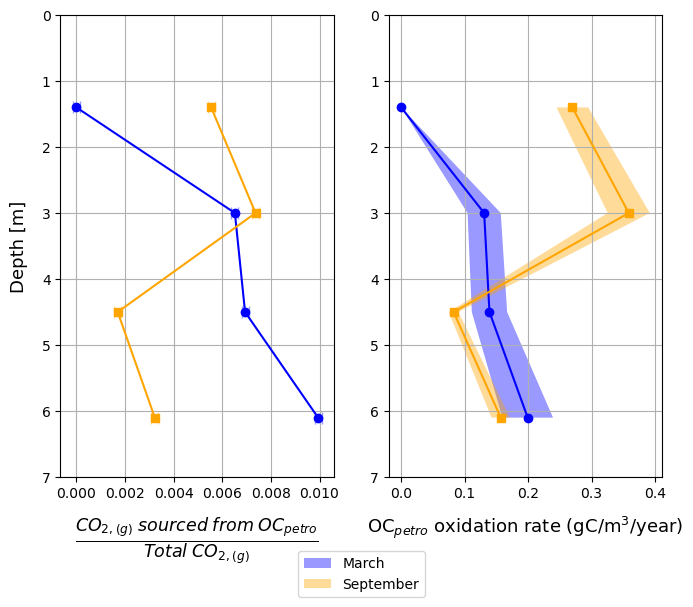

In [77]:
# make a nice plot of it
fig1 = plt.figure(figsize=(12,6))
lower_bound = 8
upper_bound = 13.5
upper_bound2 = 18
size = 60
mult = 365

#subplot 1
ax1 = plt.subplot(1,3,1)
ax1 = plt

plt.ylabel('Depth [m]', fontsize=13,labelpad=10)
plt.errorbar(c14_gasnew.min_petro_ox_source_mar/100,c14_gasnew.depth_m,xerr=c14_gasnew.err_min_petro_ox_source_mar/100 ,fmt='.', color='black',
             ecolor='blue', elinewidth=3, capsize=4, alpha = 0.4)
plt.plot(c14_gasnew.min_petro_ox_source_mar/100,c14_gasnew.depth_m,'-o', color = 'blue', zorder = 3)
plt.errorbar(c14_gasnew.min_petro_ox_source_sept/100,c14_gasnew.depth_m,xerr=c14_gasnew.err_min_petro_ox_source_sept/100,fmt='.', color='black',
             ecolor='orange', elinewidth=3, capsize=4, alpha = 0.4)
plt.plot(c14_gasnew.min_petro_ox_source_sept/100,c14_gasnew.depth_m, '-s', color='orange', zorder = 4)

plt.gca().set_ylim([0, 7])
plt.gca().invert_yaxis()
ax1.grid()
plt.xlabel(r'$\frac{CO_{2,(g)}\;sourced\;from\;OC_{petro}}{Total\;CO_{2,(g)}}$',fontsize=18,labelpad=10)

# subplot 2
ax2 = plt.subplot(1,3,2)
ax2 = plt
mult = 365;
ax2.fill_betweenx(c14_gasnew.depth_m, c14_gasnew.petro_mar_fb5*mult, c14_gasnew.petro_mar_fb10*mult, facecolor='blue', alpha=0.4,label='March') #,label='seasonally saturated'
ax2.fill_betweenx(c14_gasnew.depth_m, c14_gasnew.petro_sep_fb5*mult, c14_gasnew.petro_sep_fb10*mult, facecolor='orange', alpha=0.4,label='September') #,label='saturated'

ax2.plot(c14_gasnew.petro_mar_fbreal*mult,c14_gasnew.depth_m, '-o',color = 'blue')
ax2.plot(c14_gasnew.petro_sept_fbreal*mult,c14_gasnew.depth_m, '-s', color = 'orange')

plt.gca().set_ylim([0, 7])
plt.gca().invert_yaxis()
ax2.grid()
plt.legend(loc='upper center',bbox_to_anchor=(-0.1, -0.145))
plt.xlabel('OC$_{petro}$ oxidation rate (gC/m$^3$/year)',fontsize=13,labelpad=10)

In [78]:
max(c14_gasnew.min_petro_ox_source_mar)/100

0.009939789040978224

In [79]:
min(c14_gasnew.min_petro_ox_source_sept)/100

0.0016982187216564172

In [80]:
max(c14_gasnew.err_min_petro_ox_source_sept/100)

0.00014342315912191004

In [82]:
c14_gasnew.petro_sept_fbreal

1    0.000739
2    0.000983
4    0.000226
5    0.000430
Name: petro_sept_fbreal, dtype: float64

In [83]:
c14_gasnew.petro_sep_fb10

1    0.000807
2    0.001073
4    0.000247
5    0.000470
Name: petro_sep_fb10, dtype: float64

# Determing percentage of petroOC in the rock

In [84]:
petroOC_content = hemsolid(c14_rock.c_content_per,c14_rock.fm_c14_solid,fracbio)

In [85]:
petroOC_content

0    0.286298
1    0.160887
2    0.208936
3    0.139419
4    0.145811
5    0.270924
6    0.365596
7    0.271620
8    0.310742
9    0.362589
dtype: float64

# Plot the data

/var/folders/68/ydywxrtd4r316knq5n2n7z0c0000gn/T/ipykernel_15015/3489036986.py:76: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax4.scatter(rock_chip_incu['230'], rock_chip_incu.depth_m,s = size,c="black",edgecolors="black",marker='+',label='Rock chips')


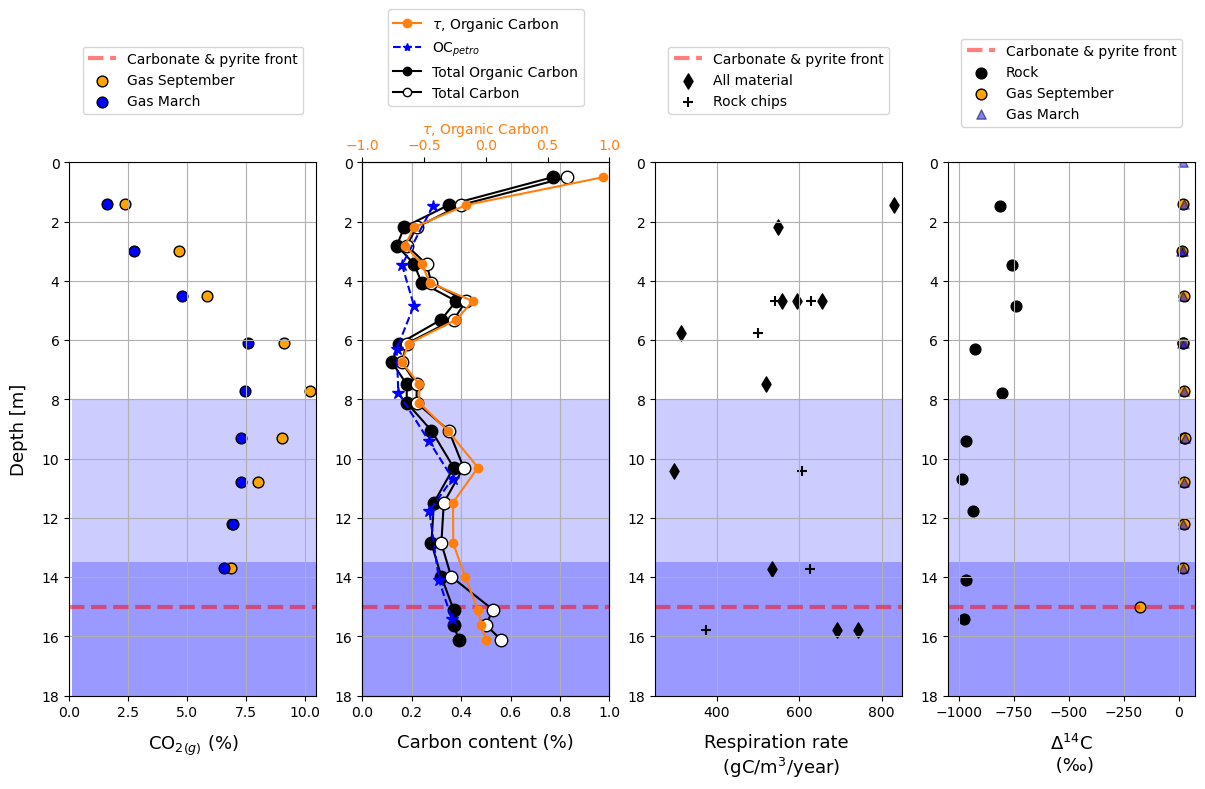

In [87]:
# plotting
fig1 = plt.figure(figsize=(12,8))
lower_bound = 8
upper_bound = 13.5
upper_bound2 = 18
size = 60
size3 = 45
size2 = 9

#subplot 1 - gas concentrations
ax2 = plt.subplot(1,4,1)
ax2.fill_between([0.1,10.5], lower_bound, upper_bound, facecolor='blue', alpha=0.2) #,label='seasonally saturated'
ax2.fill_between([0.1,10.5], upper_bound, upper_bound2, facecolor='blue', alpha=0.4) #,label='saturated'
ax2.axhline(y=15 ,linewidth=3, linestyle='--', color='r',label='Carbonate & pyrite front',alpha=0.5)
plt.scatter(c14gas_plottinglater.co2_per_sept, c14gas_plottinglater.depth_m,s = size,c="orange",edgecolors="black",label='Gas September')
plt.scatter(c14gas_plottinglater.co2_per_mar, c14gas_plottinglater.depth_m,s = size,c="blue",edgecolors="black",label='Gas March')
plt.ylabel('Depth [m]', fontsize=13,labelpad=10)
plt.gca().set_ylim([0, 18])
plt.gca().set_xlim([0, 10.5])
plt.gca().invert_yaxis()
ax2.grid()
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.23))
plt.xlabel('CO$_{2(g)}$ (%)',fontsize=13,labelpad=10)

# subplot 2 - rock carbon content
ax3 = plt.subplot(1,4,2)
ax3.fill_between([0,1], lower_bound, upper_bound, facecolor='blue', alpha=0.2) #,label='seasonally saturated'
ax3.fill_between([0,1], upper_bound, upper_bound2, facecolor='blue', alpha=0.4) #,label='saturated'
ax3.axhline(y=15 ,linewidth=3, linestyle='--', color='r',label='Carbonate & pyrite front',alpha=0.5)
plt.plot(vms_miner["C_ORG_per"], vms_miner["Avg_Depth_Below_Ground_Surface_m"],'-o',markersize = size2,c="black",markeredgecolor="black",label='Organic Carbon')
plt.plot(vms_miner["TOT_C_per"], vms_miner["Avg_Depth_Below_Ground_Surface_m"],'-o',markersize = size2,c="black",markerfacecolor="white",markeredgecolor="black",label='Total Carbon')

plt.plot(petroOC_content, c14_rock.depth_m,'--*',markersize = size2, color="blue",label='OC$_{petro}$')
ax3.set_xlim([0, 1])

ax3.grid()
plt.xlabel('Carbon content (%)',fontsize=13,labelpad=10)

ax5 = ax3.twiny()
color = 'tab:orange'
ax5.set_xlabel('$\\tau$, Organic Carbon', color=color)
ax5.plot(vms_miner.tau_C_ORG_per,vms_miner.Avg_Depth_Below_Ground_Surface_m,'-o', color=color, label='try')
ax5.tick_params(axis='x', labelcolor=color)
mpl.ticker.LinearLocator()
ax5.set_xlim([-1, 1])

orange_line = mlines.Line2D([], [], color='tab:orange', marker='o',
                          markersize=6, label='$\\tau$, Organic Carbon')
blue_line = mlines.Line2D([], [], color='black', marker='o', markeredgecolor="black",
                          markersize=6, label='Total Organic Carbon')
blue_line2 = mlines.Line2D([], [], color='black',markerfacecolor="white", marker='o', markeredgecolor="black",
                          markersize=6, label='Total Carbon')
orange_line2 = mlines.Line2D([], [], color='blue', marker='*',
                          markersize=6, label='OC$_{petro}$', linestyle ='--')
leg = plt.legend(handles=[orange_line,orange_line2,blue_line,blue_line2],loc='upper center',bbox_to_anchor=(0.5, 1.3))

plt.gca().set_ylim([0, 18])
plt.gca().invert_yaxis()

# plot 3 incubation data
ax4 = plt.subplot(1,4,3)
bounds_here = [250,850]
ax4.fill_between(bounds_here, lower_bound, upper_bound, facecolor='blue', alpha=0.2) #,label='seasonally saturated'
ax4.fill_between(bounds_here, upper_bound, upper_bound2, facecolor='blue', alpha=0.4) #,label='saturated'
ax4.axhline(y=15 ,linewidth=3, linestyle='--', color='r',alpha=0.5,label='Carbonate & pyrite front')
ax4.scatter(all_sample_incu['230'], all_sample_incu.depth_m,s = size,c="black",edgecolors="black",marker='d',label='All material')
ax4.scatter(rock_chip_incu['230'], rock_chip_incu.depth_m,s = size,c="black",edgecolors="black",marker='+',label='Rock chips')
plt.xlabel('Respiration rate \n (gC/m$^3$/year)',fontsize=13,labelpad=10)
plt.gca().set_ylim([0, 18])
plt.gca().set_xlim(bounds_here)
plt.gca().invert_yaxis()
ax4.legend(loc='upper center',bbox_to_anchor=(0.5, 1.23))
ax4.grid()

#subplot 4 - radiocarbon of solid and gas
ax1 = plt.subplot(1,4,4)
ax1.fill_between([-1050,75], lower_bound, upper_bound, facecolor='blue', alpha=0.2) #,label='seasonally saturated'
ax1.fill_between([-1050,75], upper_bound, upper_bound2, facecolor='blue', alpha=0.4) #,label='saturated'
ax1.axhline(y=15 ,linewidth=3, linestyle='--', color='r',alpha=0.5,label='Carbonate & pyrite front')
plt.scatter(c14_rock.Dc14_solid, c14_rock.depth_m,s = size,c="black",edgecolors="black",label='Rock')
plt.scatter(c14_gas.Dc14_sept, c14_gas.depth_m,s = size,c="orange",edgecolors="black",label='Gas September')
plt.scatter(c14_gas.Dc14_mar, c14_gas.depth_m,s = size3, marker = '^',c="blue",edgecolors="black",label='Gas March',alpha=0.5)
plt.xlabel(u'$\Delta^{14}$C \n (‰)',fontsize=13,labelpad=10)
plt.gca().set_ylim([0, 18])
plt.gca().set_xlim([-1050, 75])
plt.gca().invert_yaxis()
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.245))
ax1.grid()

plt.tight_layout(pad=0.2)

In [90]:
all_sample_incu_gcm3yr = all_sample_incu['230'] # formerly asis_gcm3yr
rock_chip_incu_gcm3yr = rock_chip_incu['230'] # formerly rc_gcm3yr

In [91]:
np.mean(rock_chip_incu_gcm3yr)

545.6949414971751

# Compare VMS mineralogy to the wells (Gu 2020) at ERCZO for landscape scale analysis

In [94]:
wellminer
# add water table depths for each well based on Gu plots
well = np.array([3,10,14,15])
wellno = list(range(0, np.size(well)))
parent = wellminer.Well.index[wellminer.Well == 100].to_list()
seastop = np.array([3.5,11,8.5,19])  #3:50
sattop = np.array([10,19,28.5,26.5])

In [95]:
wellminer

,Sample,Well,Depth_m,LOI_wtper,Al_wtper,Ba_wtper,Ca_wtper,Fe_wtper,K_wtper,Mg_wtper,...,Err_Tau_Mn_by_Ti,Err_Tau_Na_by_Ti,Err_Tau_P_by_Ti,Err_Tau_Si_by_Ti,Err_Tau_Sr_by_Ti,Err_Tau_Ti_by_Ti,Err_Tau_S_by_Ti,Err_Tau_TC_by_Ti,Err_Tau_TIC_by_Ti,C-V
0,W14-1,14,0.3048,7.80,9.992253,0.063100,0.357345,5.749278,1.876134,1.573924,...,0.151328,0.052642,0.147198,0.067790,0.071680,0.1,0.004679,0.181791,NaN,NaN
1,W14-2,14,0.9144,7.00,9.717043,0.060600,0.407374,5.581416,1.768215,1.543772,...,0.112817,0.058831,0.102754,0.070425,0.076790,0.1,NaN,NaN,NaN,NaN
2,W14-3,14,1.5240,6.60,9.314812,0.053900,0.507430,3.727674,1.577281,1.561863,...,0.156580,0.070231,0.113999,0.073274,0.088106,0.1,0.008081,0.158412,NaN,NaN
3,W14-4,14,2.1336,6.90,9.791138,0.053200,0.471696,5.294651,1.776516,1.579954,...,0.152896,0.065097,0.135391,0.070595,0.083189,0.1,NaN,NaN,NaN,NaN
4,W14-5,14,2.7432,7.80,10.002838,0.061900,0.500284,5.833209,1.975752,1.706592,...,0.123070,0.057498,0.095116,0.065257,0.080353,0.1,0.004573,0.076252,NaN,0.705605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,w15-66.5,15,20.2692,NaN,9.359640,0.048723,0.453364,5.217015,2.167225,1.792193,...,0.113258,0.060454,0.157625,0.072421,0.069763,0.1,0.075533,0.088852,NaN,1.439936
60,W15-20,15,22.8600,7.90,9.822893,0.055600,1.057742,5.693324,2.166686,1.791017,...,0.103144,0.052486,0.150703,0.067936,0.065473,0.1,0.002645,0.095105,NaN,3.447368
61,W15-85,15,25.9080,NaN,9.871981,0.056919,0.435211,5.415477,2.301709,1.685515,...,0.070983,0.052176,0.120911,0.067503,0.052420,0.1,0.017102,0.089504,NaN,3.652511
62,W15-22,15,34.1376,6.80,10.092811,0.049700,0.821894,5.511473,2.249700,1.821168,...,0.111306,0.076563,0.158238,0.071911,0.185086,0.1,0.107940,0.101687,NaN,3.324324


In [96]:
# make the OC tau from the Ti data and a new column for TC-TIC
wellminer["OC_wtper"] = np.nan
wellminer.TIC_wtper = np.nan_to_num(wellminer.TIC_wtper)
wellminer.OC_wtper = np.subtract(wellminer.TC_wtper,wellminer.TIC_wtper)

wellminer["OC_tau_Ti"] = np.nan
wellminer.OC_tau_Ti = tau(wellminer.Ti_wtper,wellminer.Ti_wtper.iloc[parent].item(),wellminer.OC_wtper,wellminer.OC_wtper.iloc[parent].item())

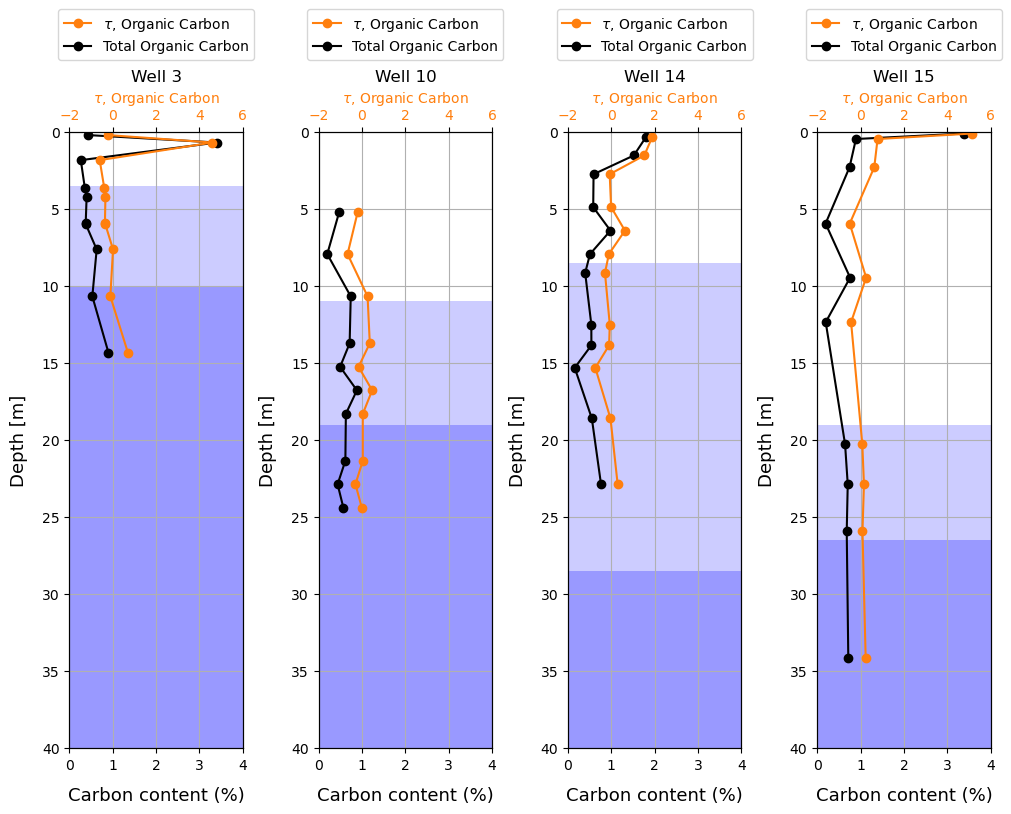

In [97]:
# make a nice figure of the profile
ocxlim = 4

# plotting code
fig1 = plt.figure(figsize=(10,8))
for i in wellno:
  ax1 = plt.subplot(1,4,i+1)
  ax1.fill_between([0,ocxlim], seastop[i], sattop[i], facecolor='blue', alpha=0.2) #,label='seasonally saturated'
  ax1.fill_between([0,ocxlim], sattop[i], 40, facecolor='blue', alpha=0.4) #,label='saturated'
  idxwell = wellminer.Well.index[wellminer.Well == well[i]].tolist()
  s1mask = np.isfinite(wellminer.OC_wtper.iloc[idxwell])
  plt.plot(wellminer.OC_wtper.iloc[idxwell][s1mask],wellminer.Depth_m[idxwell][s1mask],'-o', color='k', label='try')

  # plot maintenance
  plt.ylabel('Depth [m]', fontsize=13,labelpad=10)
  plt.gca().set_ylim([0, 40])
  plt.gca().set_xlim([0, ocxlim])
  plt.gca().invert_yaxis()
  plt.title("Well " +  str(well[i]))
  ax1.grid()
  plt.xlabel('Carbon content (%)',fontsize=13,labelpad=10)

  # second axis for tau
  ax11 = ax1.twiny()
  ax11.set_xlabel('$\\tau$, Organic Carbon', color=color)
  s1mask = np.isfinite(wellminer.OC_tau_Ti.iloc[idxwell])
  ax11.plot(wellminer.OC_tau_Ti.iloc[idxwell][s1mask],wellminer.Depth_m[idxwell][s1mask],'-o', color=color, label='try')
  ax11.tick_params(axis='x', labelcolor=color)
  mpl.ticker.LinearLocator()
  ax11.set_xlim([-2, 6])

  orange_line = mlines.Line2D([], [], color='tab:orange', marker='o',
                          markersize=6, label='$\\tau$, Organic Carbon')
  blue_line = mlines.Line2D([], [], color='black', marker='o', markeredgecolor="black",
                          markersize=6, label='Total Organic Carbon')
  blue_line2 = mlines.Line2D([], [], color='black',markerfacecolor="white", marker='o', markeredgecolor="black",
                          markersize=6, label='Total Carbon')
  leg = plt.legend(handles=[orange_line,blue_line],loc='upper center',bbox_to_anchor=(0.5, 1.21))

  del idxwell

plt.tight_layout(pad=0.2)

# Calculate rates of petroOC oxidation from solid phase

In [102]:
# function to calculate the removal rate of minerals from the rock profile

def rate_rock_removal (cbot,ctop,dbot,dtop,uplift): # parent, cbot, ctop in percent; dtop, dbot in m; uplift in m/yr
  bot_num = cbot
  top_num = ctop
  min_removed_per_g = np.subtract(bot_num,top_num)
  min_removed_g_g = np.divide(min_removed_per_g,100)
  bulk_den = 2650000
  min_removed_g_m3 = np.multiply(bulk_den,min_removed_g_g)
  change_depth = np.subtract(dbot,dtop)
  dC_dz_g_m4 = np.divide(min_removed_g_m3,change_depth)
  removal_rate_g_m3_yr = np.multiply(dC_dz_g_m4,uplift)
  removal_rate_g_m2_yr = np.multiply(removal_rate_g_m3_yr,change_depth)
  return removal_rate_g_m2_yr

In [104]:
def rate_rock_removal_bulk (cbot,ctop,dbot,dtop,bulkbot,bulktop,uplift): # parent, cbot, ctop in percent; dtop, dbot in m; uplift in m/yr
  bot_gC_m3 = np.multiply(np.divide(cbot,100),bulkbot)
  top_gC_m3 = np.multiply(np.divide(ctop,100),bulktop)
  change_depth = np.subtract(dbot,dtop) 
  min_removed_g_m3 = np.subtract(bot_gC_m3,top_gC_m3)
  # dC_dz_g_m4 = np.divide(min_removed_g_m3,change_depth)
  # removal_rate_g_m3_yr = np.multiply(dC_dz_g_m4,uplift)
  # removal_rate_g_m2_yr = np.multiply(removal_rate_g_m3_yr,change_depth)
  mult_erosion = np.divide(change_depth,uplift)
  removal_rate_g_m3_yr = np.divide(min_removed_g_m3,mult_erosion)
  return removal_rate_g_m3_yr

In [105]:
# find the bulk density of interest
bot_bulk_den_idx = 12
top_bulk_den_idx = 11

In [106]:
uplift_rate = 0.0002

In [107]:
# calculate the removal of petrocOC from the VMS
parent2 = -1
bot_vms_tau_idx = -2
top_vms_tau_idx = -7
uplift_rate = 0.0002 # uplift rate in m/yr

vms_oc_removal_rate = rate_rock_removal(vms_miner.C_ORG_per.iloc[bot_vms_tau_idx],
                  vms_miner.C_ORG_per.iloc[top_vms_tau_idx],
                  vms_miner.Avg_Depth_Below_Ground_Surface_m.iloc[bot_vms_tau_idx],
                  vms_miner.Avg_Depth_Below_Ground_Surface_m.iloc[top_vms_tau_idx],
                  uplift_rate)

vms_oc_removal_rate_bulk = rate_rock_removal_bulk(vms_miner.C_ORG_per.iloc[bot_vms_tau_idx],
                  vms_miner.C_ORG_per.iloc[top_vms_tau_idx],
                  vms_miner.Avg_Depth_Below_Ground_Surface_m.iloc[bot_vms_tau_idx],
                  vms_miner.Avg_Depth_Below_Ground_Surface_m.iloc[top_vms_tau_idx],
                  bulk_den.avg_bulk_den.iloc[bot_bulk_den_idx],
                  bulk_den.avg_bulk_den.iloc[top_bulk_den_idx],
                  uplift_rate)

In [109]:
# calculate the remocal of petroOC from the wells
bot_well3_tau_idx = 40 # has IC value
top_well3_tau_idx = 38 # 33 # has IC value

well3_oc_removal_rate = rate_rock_removal(wellminer.OC_wtper.iloc[bot_well3_tau_idx],
                                          wellminer.OC_wtper.iloc[top_well3_tau_idx],
                                          wellminer.Depth_m.iloc[bot_well3_tau_idx],
                                          wellminer.Depth_m.iloc[top_well3_tau_idx],
                                          uplift_rate)

well3_oc_removal_rate_bulk = rate_rock_removal_bulk(wellminer.OC_wtper.iloc[bot_well3_tau_idx],
                                          wellminer.OC_wtper.iloc[top_well3_tau_idx],
                                          wellminer.Depth_m.iloc[bot_well3_tau_idx],
                                          wellminer.Depth_m.iloc[top_well3_tau_idx],
                                          bulk_den.avg_bulk_den.iloc[bot_bulk_den_idx],
                                          bulk_den.avg_bulk_den.iloc[top_bulk_den_idx],
                                          uplift_rate)

# well 15
bot_well15_tau_idx = 60 # no IC value
top_well15_tau_idx = 55 # no IC value

well15_oc_removal_rate = rate_rock_removal(wellminer.OC_wtper.iloc[bot_well15_tau_idx],
                                          wellminer.OC_wtper.iloc[top_well15_tau_idx],
                                          wellminer.Depth_m.iloc[bot_well15_tau_idx],
                                          wellminer.Depth_m.iloc[top_well15_tau_idx],
                                          uplift_rate)

well15_oc_removal_rate_bulk = rate_rock_removal_bulk(wellminer.OC_wtper.iloc[bot_well15_tau_idx],
                                          wellminer.OC_wtper.iloc[top_well15_tau_idx],
                                          wellminer.Depth_m.iloc[bot_well15_tau_idx],
                                          wellminer.Depth_m.iloc[top_well15_tau_idx],
                                          bulk_den.avg_bulk_den.iloc[bot_bulk_den_idx],
                                          bulk_den.avg_bulk_den.iloc[top_bulk_den_idx],
                                          uplift_rate)

# well 14
bot_well14_tau_idx = 16 # has IC value
top_well14_tau_idx = 12 # has IC value

well14_oc_removal_rate = rate_rock_removal(wellminer.OC_wtper.iloc[bot_well14_tau_idx],
                                          wellminer.OC_wtper.iloc[top_well14_tau_idx],
                                          wellminer.Depth_m.iloc[bot_well14_tau_idx],
                                          wellminer.Depth_m.iloc[top_well14_tau_idx],
                                          uplift_rate)

well14_oc_removal_rate_bulk = rate_rock_removal_bulk(wellminer.OC_wtper.iloc[bot_well14_tau_idx],
                                          wellminer.OC_wtper.iloc[top_well14_tau_idx],
                                          wellminer.Depth_m.iloc[bot_well14_tau_idx],
                                          wellminer.Depth_m.iloc[top_well14_tau_idx],
                                          bulk_den.avg_bulk_den.iloc[bot_bulk_den_idx],
                                          bulk_den.avg_bulk_den.iloc[top_bulk_den_idx],
                                          uplift_rate)

In [112]:
print([vms_oc_removal_rate,well3_oc_removal_rate,well15_oc_removal_rate,well14_oc_removal_rate])
print([vms_oc_removal_rate_bulk,well3_oc_removal_rate_bulk,well15_oc_removal_rate_bulk,well14_oc_removal_rate_bulk])

[0.5300000000000001, 1.4416000000000002, 2.6912671999608797, 3.21445]
[0.11633398592132732, 0.21415506740634688, 0.2399229849783934, 0.3971443092701647]


In [114]:
# fun test to see if its right

def c_conc_any_depth(rate_ofint,cbot,bulkbot,bulktop,eps,dbot,dtop):
    toppy = np.multiply(rate_ofint,np.subtract(dbot,dtop))
    right = np.divide(toppy,eps)
    left = np.multiply(np.divide(cbot,100),bulkbot)
    numer = np.subtract(left,right)
    c_shal = np.multiply(np.divide(numer,bulktop),100)
    return c_shal

In [115]:
soil_bulk_den_idx = 0

In [116]:
conc_soil = c_conc_any_depth(vms_oc_removal_rate_bulk,vms_miner.C_ORG_per.iloc[bot_vms_tau_idx],
                 bulk_den.avg_bulk_den.iloc[bot_bulk_den_idx],bulk_den.avg_bulk_den.iloc[soil_bulk_den_idx],
                 uplift_rate,vms_miner.Avg_Depth_Below_Ground_Surface_m.iloc[bot_vms_tau_idx],1.5)

In [117]:
print(conc_soil)

0.046698385678832645


In [118]:
vms_miner.C_ORG_per.iloc[bot_vms_tau_idx]

0.39

In [119]:
bulk_den.avg_bulk_den.iloc[bot_bulk_den_idx]

2453404.9999999995

In [120]:
bulk_den.avg_bulk_den.iloc[bot_bulk_den_idx]*(0.39/100)

9568.279499999999